<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h2>Logistic Regression</h2>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

watermark  1.8.1
numpy      1.16.2
matplotlib 3.1.0
pandas     0.24.2
seaborn    0.9.0
Tue Sep 24 2019 2019-09-24T09:52:29-04:00

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 46e8ada9ae78bc5ab280631b85d64d9ea1891da7


# Load the dataset

In [4]:
data = pd.read_csv('data/iris.csv', delimiter=',', header=0)

Quick visualization of the data. Always a good way to make sure we have what we expect

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


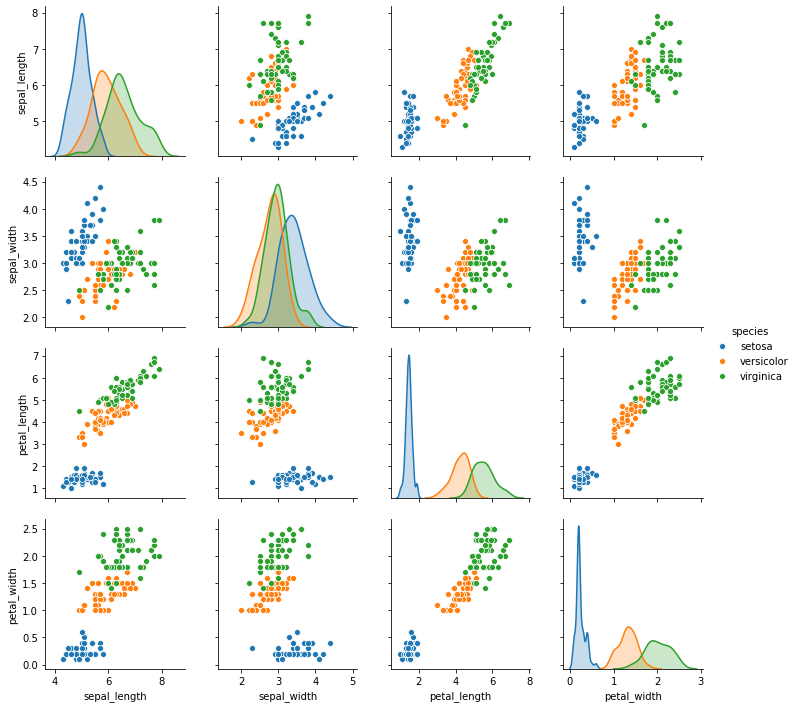

In [6]:
sns.pairplot(data, hue='species')

Set the labels. We will try to predict the 'virginica' label

In [7]:
data['y'] = 0
data.loc[data['species'] == 'virginica', 'y'] = 1

Extract the data as arrays

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,y
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [9]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].values
y = data['y'].values.reshape(-1,1)

## Utility functions

Logistic function

In [12]:
def logistic(z):
    return 1./(1+np.exp(-z))

Get matrix dimensions and add the bias column

In [13]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1)

Now we have a few more features

In [15]:
print(X)

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.4 3.7 1.5 0.2]
 [1.  4.8 3.4 1.6 0.2]
 [1.  4.8 3.  1.4 0.1]
 [1.  4.3 3.  1.1 0.1]
 [1.  5.8 4.  1.2 0.2]
 [1.  5.7 4.4 1.5 0.4]
 [1.  5.4 3.9 1.3 0.4]
 [1.  5.1 3.5 1.4 0.3]
 [1.  5.7 3.8 1.7 0.3]
 [1.  5.1 3.8 1.5 0.3]
 [1.  5.4 3.4 1.7 0.2]
 [1.  5.1 3.7 1.5 0.4]
 [1.  4.6 3.6 1.  0.2]
 [1.  5.1 3.3 1.7 0.5]
 [1.  4.8 3.4 1.9 0.2]
 [1.  5.  3.  1.6 0.2]
 [1.  5.  3.4 1.6 0.4]
 [1.  5.2 3.5 1.5 0.2]
 [1.  5.2 3.4 1.4 0.2]
 [1.  4.7 3.2 1.6 0.2]
 [1.  4.8 3.1 1.6 0.2]
 [1.  5.4 3.4 1.5 0.4]
 [1.  5.2 4.1 1.5 0.1]
 [1.  5.5 4.2 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.  3.2 1.2 0.2]
 [1.  5.5 3.5 1.3 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  4.4 3.  1.3 0.2]
 [1.  5.1 3.4 1.5 0.2]
 [1.  5.  3.5 1.3 0.3]
 [1.  4.5 2.3 1.3 0.3]
 [1.  4.4 3.2 1.3 0.2]
 [1.  5.  3

Set the training parameters and initialize the weight matrix

In [16]:
alpha = 0.5
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon

# Training procedure

In [17]:
oldJ = 0
err = 1

Js = []
count = 0

while err > 1e-3:
    Zs = np.dot(X, weights)
    Hs = logistic(Zs)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = -1/M*np.dot(y.T, np.log(Hs)) - np.dot(1-y.T, np.log(1-Hs))
    Js.append(float(J))
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 10 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

10 [[2.49485745]] [[93.67236716]] [-0.15986133 -0.06064576 -0.63095117  1.48523783  0.7479098 ]
20 [[1.72940435]] [[300.50916985]] [-0.32850191 -0.35054406 -1.03087555  2.32309334  1.29381276]
30 [[1.58796184]] [[324.22986929]] [-0.48146978 -0.67407131 -1.33301791  2.86959735  1.70815205]
40 [[1.38807939]] [[289.84205551]] [-0.61686698 -0.98926784 -1.55704652  3.23929241  2.0378652 ]
50 [[1.22743197]] [[263.01618]] [-0.74571058 -1.28450835 -1.75985398  3.58854243  2.35463838]
60 [[1.11856595]] [[236.86154391]] [-0.87191206 -1.5733733  -1.95664529  3.9260386   2.66372409]
70 [[1.04230856]] [[210.24820989]] [-0.99539264 -1.85665999 -2.14890746  4.2497912   2.96392048]
80 [[0.98304782]] [[182.79182981]] [-1.11508219 -2.13250891 -2.33535757  4.55360961  3.25132237]
90 [[0.93363516]] [[153.72431917]] [-1.22955501 -2.39884547 -2.51410521  4.82685659  3.51909276]
100 [[0.90863253]] [[120.3163211]] [-1.33729746 -2.65716279 -2.68427804  5.04712336  3.75349648]
110 [[1.15469095]] [[71.54941042]]

## Solution exploration

In [18]:
def plot_boundary(Zs, Hs, y):
    data_fit = np.concatenate((Zs, Hs), axis=1)
    data_fit.sort(axis = 0)

    z = np.linspace(Zs.min(), Zs.max(), 100)

    plt.plot(z, logistic(z), 'r-', label='Theory')
    plt.plot(Zs, Hs, 'X', label='empirical')
    plt.plot(Zs, y, '*', label = 'data')
    plt.xlabel('z')
    plt.ylabel('h(z)')
    plt.title('Logistic Regression')
    plt.gcf().set_size_inches(11, 8)
    plt.legend()

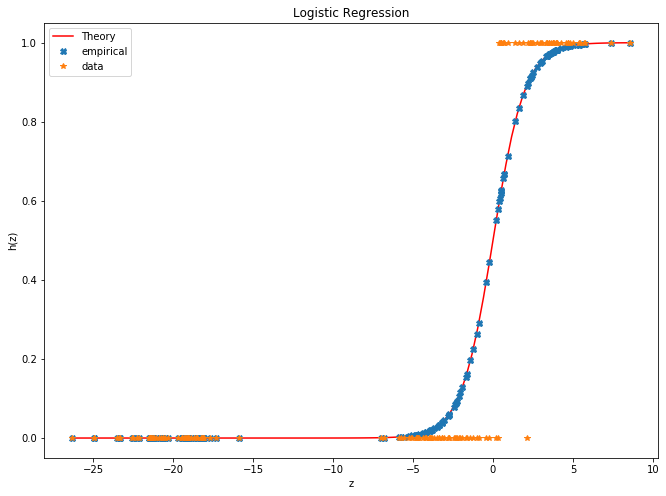

In [19]:
plot_boundary(Zs, Hs, y)

Utility function to plot labeled points

In [20]:
def plot_points(data, features, weights, label='y'):
    plt.plot(data[features[0]][data[label]==0], data[features[1]][data[label]==0], '*', label='y=0')
    plt.plot(data[features[0]][data[label]==1], data[features[1]][data[label]==1], '+', label='y=1')

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.gcf().set_size_inches(11, 8)
    plt.legend()

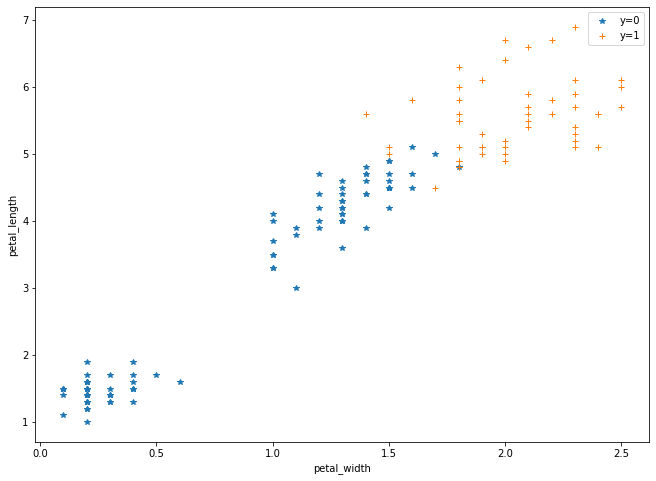

In [21]:
plot_points(data, ['petal_width', 'petal_length'], weights)

The separation bounday is not perfect here either

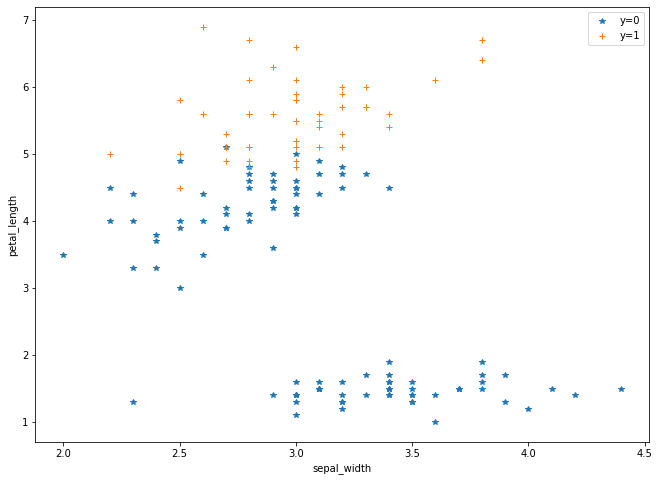

In [22]:
plot_points(data, ['sepal_width', 'petal_length'], weights)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>